### Lab 4.4: Compare the average yields of a specific crop (e.g., rice) across multiple states using ANOVA to identify if there is a significant difference.



#### **Objective:**
Develop and test null and alternative hypotheses to examine differences in crop yields across multiple states using ANOVA.



#### **Equipment Required:**
- Jupyter Notebook
- Python (Pandas, NumPy, Seaborn, Matplotlib, SciPy)



#### **Prerequisites:**
- Basic knowledge of Python
- Familiarity with data analysis and visualization
- Understanding of hypothesis testing and ANOVA



#### **Problem Statement:**
Compare the average yields of a specific crop (e.g., rice) across multiple states to determine if there is a statistically significant difference in crop yields.



#### **Dataset:**
- **Dataset Link:** [Crop Yield in Indian States](https://www.kaggle.com/datasets/akshatgupta7/crop-yield-in-indian-states-dataset)
- **Dataset Description:**
    - **Crop** – Name of the crop
    - **Crop_Year** – Year of cultivation
    - **Season** – Growing season
    - **State** – State where crop is grown
    - **Area** – Area of cultivation (in hectares)
    - **Production** – Total production (in tons)
    - **Annual_Rainfall** – Annual rainfall (in mm)
    - **Fertilizer** – Fertilizer usage (in kg per hectare)
    - **Pesticide** – Pesticide usage (in kg per hectare)
    - **Yield** – Crop yield (in tons per hectare)



In [1]:


# **Import Libraries and Load Data:**

# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway


In [2]:

# Load the dataset
file_path = 'crop_yield.csv'
df = pd.read_csv(file_path)

# Display the first few rows
df.head()


,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909


In [4]:

# Remove missing values
df.dropna(inplace=True)

# Filter dataset for a specific crop (e.g., Rice)
crop = 'Rice'
df_crop = df[df['Crop'] == crop]


In [6]:
# **Perform ANOVA Test:** Group data by state and perform an ANOVA test on crop yield.

# Group data by state and calculate yield
states = df_crop['State'].unique()
groups = [df_crop[df_crop['State'] == state]['Yield'] for state in states]

# Perform ANOVA test
f_stat, p_value = f_oneway(*groups)
print(f'F-statistic: {f_stat}, P-value: {p_value}')

F-statistic: 47.7998917343409, P-value: 1.2023296127317715e-175



##### **Interpret Results:**
- If the p-value is **less than 0.05**, reject the null hypothesis and conclude that there is a significant difference in crop yields across states.
- If the p-value is **greater than 0.05**, fail to reject the null hypothesis.


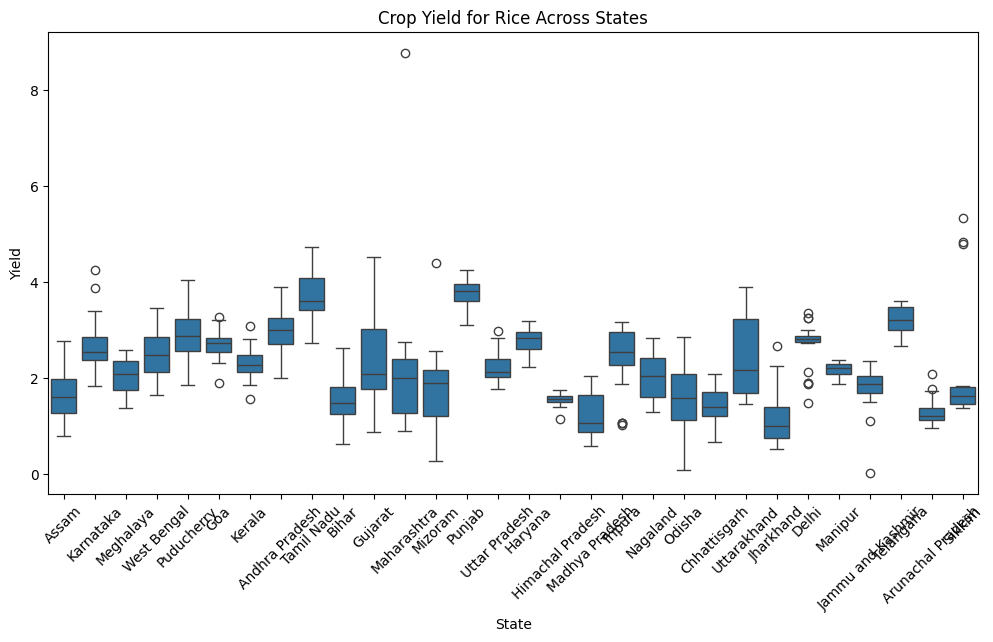

In [9]:

# **Visualization:** Visualize the distribution of crop yields across states using a boxplot.

plt.figure(figsize=(12, 6))
sns.boxplot(x='State', y='Yield', data=df_crop)
plt.title(f'Crop Yield for {crop} Across States')
plt.xticks(rotation=45)
plt.show()



##### **Conclusion:**
- If the p-value is **less than 0.05**, it indicates that the differences in crop yield across states are statistically significant.
- If the p-value is **greater than 0.05**, it indicates that the differences in crop yield across states are not statistically significant.
- The boxplot helps visualize the variation in crop yields across different states, providing a clear understanding of yield distribution.

